In [220]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [193]:
diabetes=load_diabetes()

In [194]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [195]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [196]:
df_X=diabetes.data
df_y=diabetes.target

In [197]:
X=np.array(df_X)
y=np.array(df_y)

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2022)

In [199]:
W=np.random.rand(10)
b=np.random.rand()
def model(X,w,b):
  predictions=0
  for i in range(10):
    predictions+=X[:,i]*W[i]
  predictions+=b
  return predictions

In [200]:
def MSE(a,b):
  mse=((a-b)**2).mean()
  return mse
def loss(X,w,b,y):
  prediction = model(X,w,b)
  L=MSE(prediction,y)
  return L

In [201]:
def gradient(X,w,b,y):
  N=len(W)
  y_pred=model(X,w,b)
  dW=1/N *2*X.T.dot(y_pred-y)
  db=2*(y_pred-y).mean()
  return dW,db

In [208]:
learning_rate=0.01
losses=[]
for i in range(1,1001):
  dW, db= gradient(X_train,W,b,y_train)
  W-=learning_rate*dW
  b-=learning_rate*db
  L=loss(X_train,W,b,y_train)
  losses.append(L)
  if i%100==0:
    print("Iteration %d : Loss %0.4f" %(i,L))

Iteration 100 : Loss 2896.4147
Iteration 200 : Loss 2896.3043
Iteration 300 : Loss 2896.2001
Iteration 400 : Loss 2896.1014
Iteration 500 : Loss 2896.0075
Iteration 600 : Loss 2895.9179
Iteration 700 : Loss 2895.8322
Iteration 800 : Loss 2895.7499
Iteration 900 : Loss 2895.6708
Iteration 1000 : Loss 2895.5945


In [209]:
prediction=model(X_test,W,b)
mse=loss(X_test,W,b,y_test)
mse

2913.8134029163184

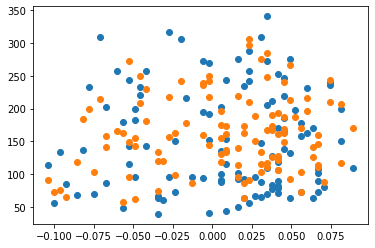

In [210]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],prediction)
plt.show()

In [224]:
skmodel=LinearRegression()
skmodel.fit(X_train,y_train)
y_pred=skmodel.predict(X_test)
y_pred

array([ 70.94219226,  61.70053886, 214.25716131, 143.06376961,
       171.66979834, 189.16656847, 173.1850281 , 126.37987094,
       267.72984427, 130.26727891,  96.44917109, 215.04502262,
        74.59021426, 180.22441206, 113.15367343, 275.01586678,
       132.5409287 , 201.98342171, 166.19175789, 111.93471362,
       102.25359957,  89.03403008, 188.79716917, 113.24207958,
       301.42204496, 164.89119856, 220.55924036, 103.68439039,
       146.70113222, 154.59573795,  56.14913135, 239.83717421,
       236.12473389, 170.16190731, 165.18574364,  84.96810281,
        85.9994433 , 247.26739157, 118.53678432, 168.66678741,
       171.62798388, 142.84676688,  94.58539476,  75.02003861,
       266.6354916 ,  73.13905704, 161.24295321, 115.27464306,
       122.80649252, 216.22018458, 104.99416432, 280.44834883,
       140.00566814, 155.32108471, 212.94057921, 263.20403456,
       215.64125172, 165.35706035, 132.85318298, 126.89153842,
       162.93728852, 196.93889967, 162.36274978,  60.59